In [1]:
import numpy as np
import pandas as pd
%load_ext google.cloud.bigquery

In [2]:
# %%bigquery covariates
# select sample_id, FieldID, instance, value from `ukbb7089_201910.phenotype` 
# where FieldID = 21001 -- bmi
# or FieldID = 21003 -- age at assessment
# or FieldID = 22001 -- genetic sex
# or FieldID = 31 -- sex
# or FieldID = 30690 -- cholesterol
# or FieldID = 30760 -- HDL cholesterol
# or FieldID = 20116 -- smoking
# or FieldID = 4079 -- diastolic bp
# or FieldID = 4080 -- systolic bp
# or FieldID = 95 -- pulse rate
# or FieldID = 53 -- instance 0 date

In [3]:
# %%bigquery diseases
# select disease, sample_id, incident_disease, prevalent_disease, censor_date from `ukbb7089_201910.disease` 
# where has_disease > 0.5

In [4]:
# %%bigquery nodiseases
# select disease, sample_id, censor_date from `ukbb7089_201910.disease` 
# where has_disease < 0.5

In [5]:
# covariates.to_csv('bq_phenotype.tsv', sep='\t', index=False)
# diseases.to_csv('bq_disease.tsv', sep='\t', index=False)
# nodiseases.to_csv('bq_nodisease.tsv', sep='\t', index=False)
covariates = pd.read_csv('bq_phenotype.tsv', sep='\t')
diseases = pd.read_csv('bq_disease.tsv', sep='\t')
# nodiseases = pd.read_csv('bq_nodisease.tsv', sep='\t')
diseases['censor_date'] = pd.to_datetime(diseases['censor_date'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
pretest = pd.read_csv('pretest_results_for_bolt.tsv', sep='\t')
test = pd.read_csv('pretest_test_results_for_bolt.tsv', sep='\t')
all_ecgs = pd.concat([test])

In [8]:
pheno_dic = {21001: ['bmi', float],
             21003: ['age', float],
             22001: ['genetic sex', int],
             31: ['sex', int],
             30690: ['cholesterol', float],
             30760: ['HDL', float],
             20116: ['smoking', int],
             4079: ['diastolic_bp', int],
             4080: ['systolic_bp', int],
             53: ['instance0_date', pd.to_datetime]
            }

for pheno in pheno_dic:
    tmp_covariates = covariates[(covariates['FieldID']==pheno) &\
                                (covariates['instance']==0)]
    if pheno == 53:
        tmp_covariates['value'] = pd.to_datetime(tmp_covariates['value'])
    else:
        tmp_covariates['value'] = tmp_covariates['value'].apply(pheno_dic[pheno][1])
    if (pheno == 4079) or (pheno == 4080):
        tmp_covariates = tmp_covariates[['sample_id', 'value']].groupby('sample_id').mean().reset_index(level=0)
    
    all_ecgs = all_ecgs.merge(tmp_covariates[['sample_id', 'value']], left_on=['FID'], right_on=['sample_id'])
    all_ecgs[pheno_dic[pheno][0]] = all_ecgs['value']
    all_ecgs = all_ecgs.drop(columns=['sample_id', 'value'])
    print(pheno_dic[pheno][0], len(tmp_covariates), len(all_ecgs))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


bmi 499416 7082
age 502521 7082
genetic sex 488279 7082
sex 502521 7082
cholesterol 469615 6600
HDL 429894 6244
smoking 501630 6228
diastolic_bp 472405 6194
systolic_bp 472400 6194
instance0_date 502521 6194


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


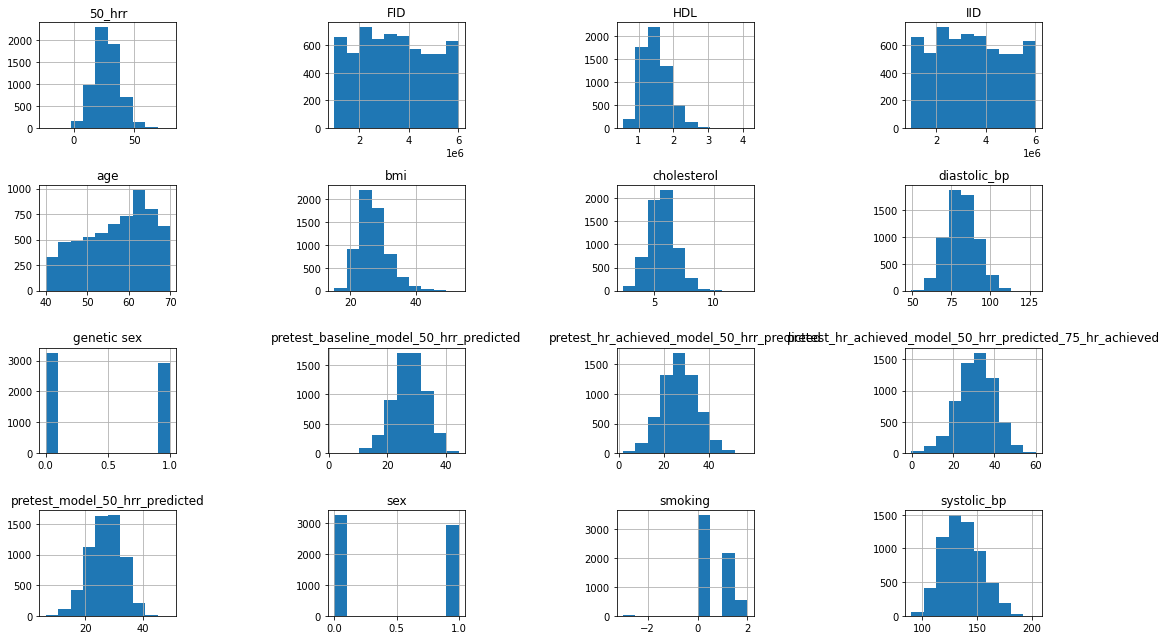

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots()
f.set_size_inches(16, 9)
all_ecgs.hist(ax=ax)
plt.tight_layout()

In [10]:
disease_list = [
    'Atrial_fibrillation_or_flutter_v2',
'Bradyarrhythmia_general_inclusive_definition',
'Cardiac_surgery',
'Congenital_heart_disease',
'Coronary_Artery_Disease_SOFT',
'DCM_I42',
'Diabetes_Type_1',
'Diabetes_Type_2',
'Heart_Failure_V2',
'Hypertension',
'Myocardial_Infarction',
'Peripheral_vascular_disease',
'Pulmonary_Hypertension',
'Sarcoidosis',
'Stroke',
'Supraventricular_arrhythmia_General_inclusive_definition',
'Venous_thromboembolism',
'composite_af_chf_dcm_death',
'composite_cad_dcm_hcm_hf_mi',
'composite_chf_dcm_death',
'composite_mi_cad_stroke',
'composite_mi_cad_stroke_death',
'composite_mi_cad_stroke_death_exclude_AML',
'composite_mi_cad_stroke_death_exclude_anycancer',
'composite_mi_cad_stroke_death_exclude_heme',
'composite_mi_cad_stroke_exclude_heme',
'composite_mi_cad_stroke_hf',
'composite_mi_death']

disease_list = [['Heart_Failure_V2', 'heart failure'], ['Myocardial_Infarction', 'myocardial infarction'],
                ['Atrial_fibrillation_or_flutter_v2', 'atrial fibrillation'], ['Diabetes_Type_2', 'type 2 diabetes'],
                ['Stroke', 'stroke'], ['Coronary_Artery_Disease_SOFT', 'coronary artery disease'],
                ['Hypertension', 'hypertension'], ['Pulmonary_Hypertension', 'pulmonary hypertension'],
                ['Peripheral_vascular_disease', 'peripheral vascular disease']
               ]

In [11]:
diseases_unpack = pd.DataFrame()
diseases_unpack['sample_id'] = np.unique(np.hstack([diseases['sample_id'], all_ecgs['FID']]))
for disease, disease_label in disease_list:
    tmp_diseases = diseases[(diseases['disease']==disease) &\
                            (diseases['incident_disease'] > 0.5)]
    tmp_diseases_unpack = diseases_unpack.merge(tmp_diseases[['sample_id', 'incident_disease', 'censor_date']], how='left', on='sample_id')
    diseases_unpack[f'{disease}_incident'] = tmp_diseases_unpack['incident_disease']
    diseases_unpack[f'{disease}_censor_date'] = tmp_diseases_unpack['censor_date']
    tmp_diseases = diseases[(diseases['disease']==disease) &\
                             (diseases['prevalent_disease'] > 0.5)]
    tmp_diseases_unpack = diseases_unpack.merge(tmp_diseases[['sample_id', 'prevalent_disease', 'censor_date']], how='left', on='sample_id')
    diseases_unpack[f'{disease}_prevalent'] = tmp_diseases_unpack['prevalent_disease']
    diseases_unpack[f'{disease}_censor_date'] = tmp_diseases_unpack['censor_date']
    diseases_unpack.loc[diseases_unpack[f'{disease}_censor_date'].isna(), f'{disease}_censor_date'] = pd.to_datetime('2017-03-31')
#     tmp_diseases = diseases[(diseases['disease']==disease) &\
#                             (diseases['has_disease'] < 0.5)]
#     tmp_diseases_unpack = diseases_unpack.merge(tmp_diseases[['sample_id', 'prevalent_disease', 'censor_date']], how='left', on='sample_id')
#     diseases_unpack[f'{disease}_censor_date'] = tmp_diseases_unpack['censor_date']

In [12]:
diseases_unpack = diseases_unpack.fillna(0)
all_ecgs = all_ecgs.fillna(0)
all_ecgs.loc[(all_ecgs['smoking'] > 0.5), 'smoking'] = 1.0
all_ecgs.loc[(all_ecgs['smoking'] <= 0.5), 'smoking'] = 0.0

In [ ]:
# # unscaled
# import statsmodels.api as sm
# or_dic = {}
# for pheno in all_ecgs:
#     if pheno in ['FID', 'IID', 'instance0_date']: 
#         continue
#     or_dic[pheno] = {}
#     tmp_pheno = all_ecgs[['FID', pheno]]
#     for disease in disease_list:
#         for occ in ['prevalent']:
#             or_dic[pheno][f'{disease}_{occ}'] = {}
#             tmp_data = tmp_pheno.merge(diseases_unpack[['sample_id', f'{disease}_{occ}']], left_on='FID', right_on='sample_id')
#             tmp_data['intercept'] = 1.0
#             res = sm.Logit(tmp_data[f'{disease}_{occ}'], tmp_data[[pheno, 'intercept']]).fit()
#             or_dic[pheno][f'{disease}_{occ}']['OR'] = np.exp(res.params[0])
#             or_dic[pheno][f'{disease}_{occ}']['CI'] = np.exp(res.conf_int().values[0])
#             or_dic[pheno][f'{disease}_{occ}']['p'] = res.pvalues[pheno]

In [13]:
label_dic = {
    '50_hrr': ['HRR50', 'beats'],
    'pretest_baseline_model_50_hrr_predicted': ['HRR50-restHR', 'beats'],
    'pretest_model_50_hrr_predicted': ['HRR50-pretest', 'beats'],
    'pretest_hr_achieved_model_50_hrr_predicted': ['HRR50-pretest-maxHR', 'beats'],
    'pretest_hr_achieved_model_50_hrr_predicted_75_hr_achieved': ['HRR50-pretest-0.75*maxHR', 'beats'],
    'bmi': ['BMI', 'units'],
    'age': ['Age', 'yrs'],
    'sex': ['Male', ''],
    'cholesterol': ['Cholesterol', 'mmol/L'],
    'HDL': ['HDL', 'mmol/L'],
    'smoking': ['Smoking', ''],
    'diastolic_bp': ['Diastolic blood pressure', 'mmHg'],
    'systolic_bp': ['Systolic blood pressure', 'mmHg'],   
}

In [14]:
# scaled
import statsmodels.api as sm
or_dic = {}
for pheno in all_ecgs:
    if pheno in ['FID', 'IID', 'instance0_date']: 
        continue
    or_dic[pheno] = {}
    tmp_pheno = all_ecgs[['FID', pheno]]
    for disease, disease_label in disease_list:
        for occ in ['incident', 'prevalent']:
            or_dic[pheno][f'{disease}_{occ}'] = {}
            tmp_data = tmp_pheno.merge(diseases_unpack[['sample_id', f'{disease}_{occ}']], left_on='FID', right_on='sample_id')
            if pheno not in ['sex', 'smoking']:
                std = np.std(tmp_data[pheno].values)
                tmp_data[pheno] = (tmp_data[pheno].values - np.mean(tmp_data[pheno].values))/std
                std = ", %.1f" % std
            else:
                std = ''
            tmp_data['intercept'] = 1.0
            res = sm.Logit(tmp_data[f'{disease}_{occ}'], tmp_data[[pheno, 'intercept']]).fit()
            or_dic[pheno][f'{disease}_{occ}']['OR'] = np.exp(res.params[0])
            or_dic[pheno][f'{disease}_{occ}']['CI'] = np.exp(res.conf_int().values[0])
            or_dic[pheno][f'{disease}_{occ}']['p'] = res.pvalues[pheno]
            or_dic[pheno][f'{disease}_{occ}']['n'] = np.sum(tmp_data[f'{disease}_{occ}'])
            or_dic[pheno][f'{disease}_{occ}']['std'] = std

Optimization terminated successfully.
         Current function value: 0.057355
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.020964
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.061280
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.087612
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.103056
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.074387
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.125463
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.087622
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.038826
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.066455
 

Optimization terminated successfully.
         Current function value: 0.133242
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.179094
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.166504
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.575580
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.007580
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.002915
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.022527
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.028010
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.058350
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.021579

Optimization terminated successfully.
         Current function value: 0.062565
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.078581
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.102495
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.075029
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.126348
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.079083
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.039000
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.063921
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.135378
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.165339
  

Optimization terminated successfully.
         Current function value: 0.161236
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.525819
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.007580
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.002918
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.021688
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.028041
         Iterations 9


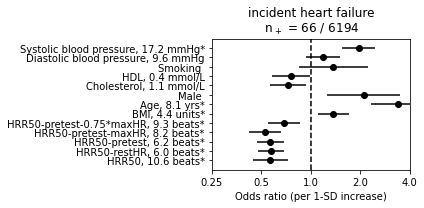

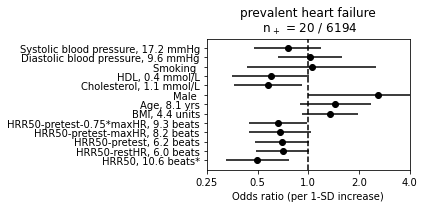

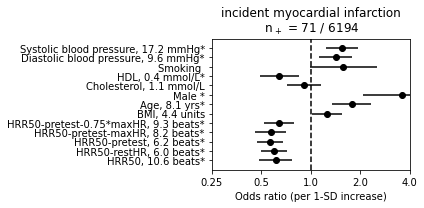

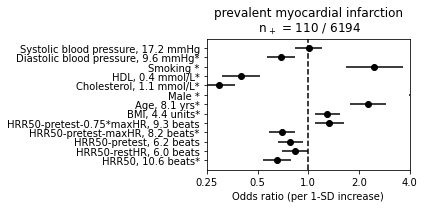

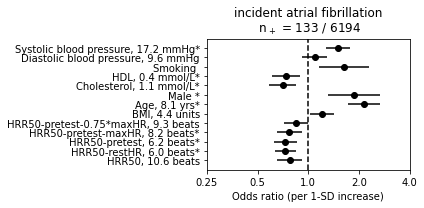

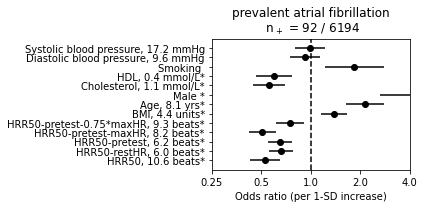

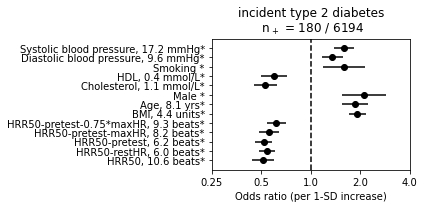

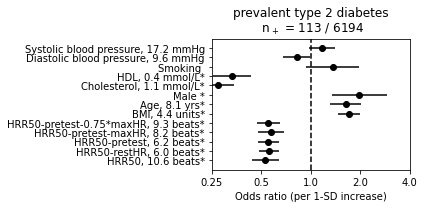

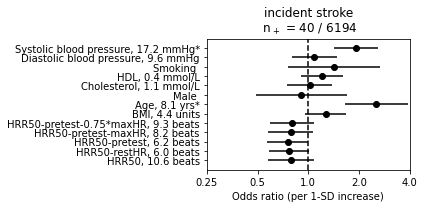

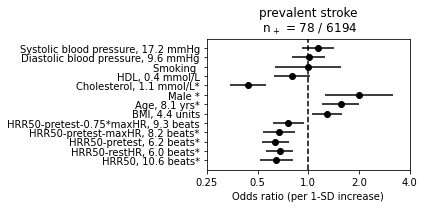

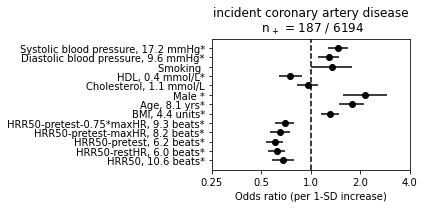

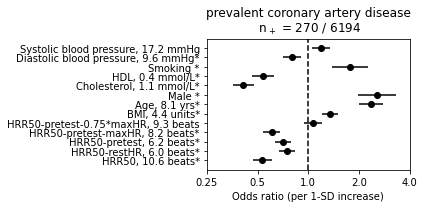

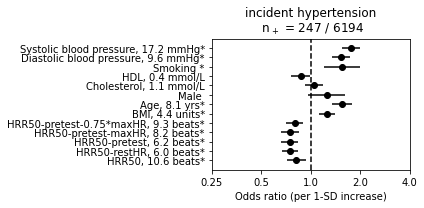

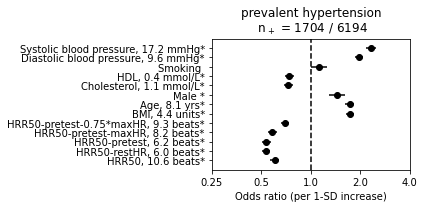

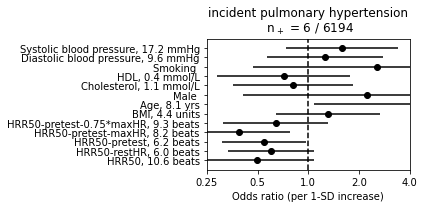

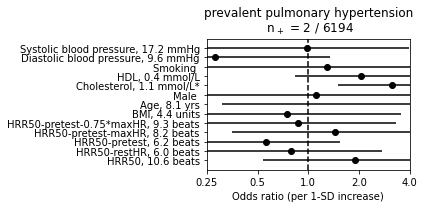

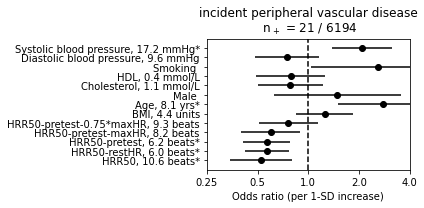

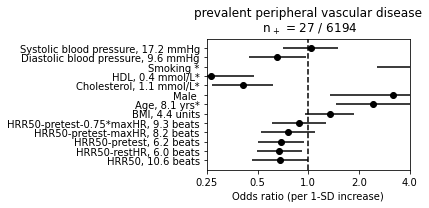

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
dis_plot_list = disease_list
phenos = or_dic['50_hrr'].keys()
for dis, dis_label in disease_list:
    for occ in ['incident', 'prevalent']: 
        ors = []
        cis_minus = []
        cis_plus = []
        labels = []
        for pheno in or_dic:
            if 'genetic' in pheno: 
                continue
            if 'hrr' in pheno:
                scale = 1.0
            elif 'age' in pheno:
                scale = 1.0
            else:
                scale = 1.0
            ors.append(np.exp(np.log(or_dic[pheno][f'{dis}_{occ}']['OR'])*scale))
            cis_minus.append(np.exp(np.log(or_dic[pheno][f'{dis}_{occ}']['OR']-or_dic[pheno][f'{dis}_{occ}']['CI'][0])*scale))
            cis_plus.append(np.exp(np.log(or_dic[pheno][f'{dis}_{occ}']['CI'][1]-or_dic[pheno][f'{dis}_{occ}']['OR'])*scale))      
            labels.append(f'{label_dic[pheno][0]}{or_dic[pheno][dis+"_"+occ]["std"]} {label_dic[pheno][1]}')
            if or_dic[pheno][f'{dis}_{occ}']['p'] < (0.05/len(or_dic)):
                labels[-1] += '*'
        f, ax = plt.subplots()
        f.set_size_inches(6, 3)
        ax.errorbar(ors, np.arange(len(ors)), xerr=(cis_minus, cis_plus), marker='o', linestyle='', color='black')  
        ax.plot([1.0, 1.0], [-1.0, len(ors)], 'k--')
        ax.set_yticks(np.arange(len(ors)))
        ax.set_yticklabels(labels)
        ax.set_xscale('log', basex=np.exp(1))   
        ax.set_xticks([0.25, 0.5, 1.0, 2.0, 4.0])
        ax.set_xticklabels(map(str, [0.25, 0.5, 1.0, 2.0, 4.0]))
#         locmin = matplotlib.ticker.LogLocator(base=np.exp(1),subs=(0.3,0.35,0.4,0.45,
#                                                                0.6,0.7,0.8,0.9,
#                                                                1.2,1.4,1.6,1.8,
#                                                                2.4,2.8,3.2,3.6))
#         ax.xaxis.set_minor_locator(locmin)
#         ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
        #ax.set_xticks(np.logspace(-0.1, 8, 6, base=np.exp(1)))
        #ax.set_xticklabels(["%.2f" %d for d in np.exp(np.arange(-0.5, 2.1, 0.5))])
        ax.set_xlabel('Odds ratio (per 1-SD increase)')
        ax.set_title(f'{occ} {dis_label}\n n$_+$ = {int(or_dic[pheno][dis+"_"+occ]["n"])} / {len(all_ecgs)}')
        ax.set_ylim([-1.0, len(ors)])
        ax.set_xlim([0.25, 4.0])
        plt.tight_layout()
        f.savefig(f'{dis}_{occ}_or_test.png', dpi=500)

In [17]:
import statsmodels.api as sm

data = sm.datasets.get_rdataset("flchain", "survival").data
df = data.loc[data.sex == "F", :]
sf = sm.SurvfuncRight(df["futime"], df["death"])

In [18]:
diseases_unpack.keys()

Index(['sample_id', 'Heart_Failure_V2_incident',
       'Heart_Failure_V2_censor_date', 'Heart_Failure_V2_prevalent',
       'Myocardial_Infarction_incident', 'Myocardial_Infarction_censor_date',
       'Myocardial_Infarction_prevalent',
       'Atrial_fibrillation_or_flutter_v2_incident',
       'Atrial_fibrillation_or_flutter_v2_censor_date',
       'Atrial_fibrillation_or_flutter_v2_prevalent',
       'Diabetes_Type_2_incident', 'Diabetes_Type_2_censor_date',
       'Diabetes_Type_2_prevalent', 'Stroke_incident', 'Stroke_censor_date',
       'Stroke_prevalent', 'Coronary_Artery_Disease_SOFT_incident',
       'Coronary_Artery_Disease_SOFT_censor_date',
       'Coronary_Artery_Disease_SOFT_prevalent', 'Hypertension_incident',
       'Hypertension_censor_date', 'Hypertension_prevalent',
       'Pulmonary_Hypertension_incident', 'Pulmonary_Hypertension_censor_date',
       'Pulmonary_Hypertension_prevalent',
       'Peripheral_vascular_disease_incident',
       'Peripheral_vascular_dise

In [19]:
# scaled
import statsmodels.api as sm
hr_dic = {}
for pheno in all_ecgs:
    if pheno in ['FID', 'IID', 'instance0_date']: 
        continue
    hr_dic[pheno] = {}
    tmp_pheno = all_ecgs[['FID', pheno, 'instance0_date']]
    for disease, disease_label in disease_list:
        for occ in ['incident']:
            hr_dic[pheno][f'{disease}_{occ}'] = {}
            tmp_data = tmp_pheno.merge(diseases_unpack[['sample_id', f'{disease}_{occ}', f'{disease}_censor_date']], left_on='FID', right_on='sample_id')
            if pheno not in ['bmi', 'sex', 'smoking']:
                std = np.std(tmp_data[pheno].values)
                tmp_data[pheno] = (tmp_data[pheno].values - np.mean(tmp_data[pheno].values))/std
                std = ", %.1f" % std
            else:
                std = ''
            tmp_data['futime'] = (tmp_data[f'{disease}_censor_date']-tmp_data['instance0_date']).dt.days
            tmp_data['entry'] = 0.0
            tmp_data['intercept'] = 1.0
            tmp_data = tmp_data[tmp_data['futime']>0]
            res = sm.PHReg(tmp_data['futime'], tmp_data[pheno], 
                           tmp_data[f'{disease}_{occ}'], tmp_data['entry']).fit()
            hr_dic[pheno][f'{disease}_{occ}']['HR'] = np.exp(res.params[0])
            hr_dic[pheno][f'{disease}_{occ}']['CI'] = np.exp(res.conf_int()[0])
            hr_dic[pheno][f'{disease}_{occ}']['p'] = res.pvalues[0]
            hr_dic[pheno][f'{disease}_{occ}']['n'] = np.sum(tmp_data[f'{disease}_{occ}'])
            hr_dic[pheno][f'{disease}_{occ}']['std'] = std

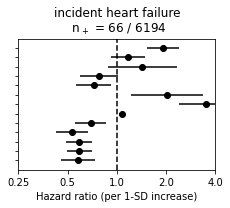

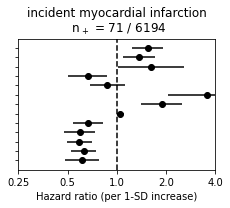

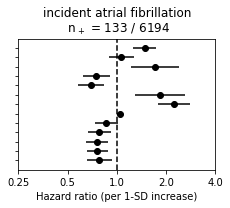

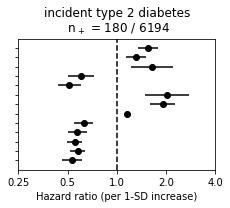

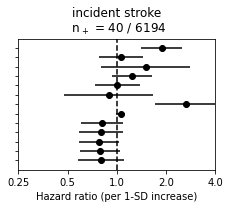

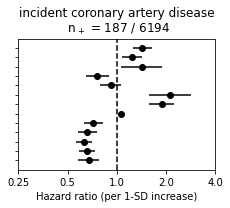

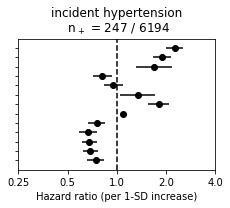

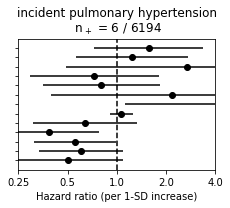

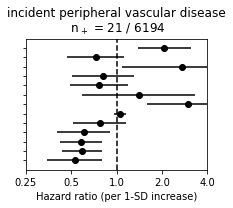

In [20]:
dis_plot_list = disease_list
phenos = hr_dic['50_hrr'].keys()
for dis, dis_label in disease_list:
    for occ in ['incident']:
        hrs = []
        cis_minus = []
        cis_plus = []
        labels = []
        for pheno in hr_dic:
            if 'genetic' in pheno: 
                continue
            if 'hrr' in pheno:
                scale = 1.0
            elif 'age' in pheno:
                scale = 1.0
            else:
                scale = 1.0
            hrs.append(np.exp(np.log(hr_dic[pheno][f'{dis}_{occ}']['HR'])*scale))
            cis_minus.append(np.exp(np.log(hr_dic[pheno][f'{dis}_{occ}']['HR']-hr_dic[pheno][f'{dis}_{occ}']['CI'][0])*scale))
            cis_plus.append(np.exp(np.log(hr_dic[pheno][f'{dis}_{occ}']['CI'][1]-hr_dic[pheno][f'{dis}_{occ}']['HR'])*scale))      
            labels.append(f'{label_dic[pheno][0]}{or_dic[pheno][dis+"_"+occ]["std"]} {label_dic[pheno][1]}')
            if hr_dic[pheno][f'{dis}_{occ}']['p'] < (0.05/len(hr_dic)):
                labels[-1] += '*'
        f, ax = plt.subplots()
        f.set_size_inches(3.3, 3)
        ax.errorbar(hrs, np.arange(len(hrs)), xerr=(cis_minus, cis_plus), marker='o', linestyle='', color='black')    
        ax.set_yticks(np.arange(len(hrs)))
        ax.set_yticklabels(labels)
        ax.set_yticklabels([])
        ax.set_xscale('log', basex=np.exp(1))  
        ax.plot([1.0, 1.0], [-1.0, len(hrs)], 'k--')
        ax.set_xticks([0.25, 0.5, 1.0, 2.0, 4.0])
        ax.set_xticklabels(map(str, [0.25, 0.5, 1.0, 2.0, 4.0]))
        ax.set_ylim([-1.0, len(hrs)])
        ax.set_xlim([0.25, 4.0])
        ax.set_xlabel('Hazard ratio (per 1-SD increase)')
        ax.set_title(f'{occ} {dis_label}\n n$_+$ = {int(hr_dic[pheno][dis+"_"+occ]["n"])} / {len(all_ecgs)}')
        plt.tight_layout()
        f.savefig(f'{dis}_{occ}_hr_test.png', dpi=500)

In [21]:
all_ecgs.keys()

Index(['FID', 'IID', '50_hrr', 'pretest_baseline_model_50_hrr_predicted',
       'pretest_model_50_hrr_predicted',
       'pretest_hr_achieved_model_50_hrr_predicted',
       'pretest_hr_achieved_model_50_hrr_predicted_75_hr_achieved', 'bmi',
       'age', 'genetic sex', 'sex', 'cholesterol', 'HDL', 'smoking',
       'diastolic_bp', 'systolic_bp', 'instance0_date'],
      dtype='object')

In [22]:
l = ['a', 'b']
l.remove('b')
l

['a']

In [23]:
# scaled
import statsmodels.api as sm
or_multi_dic = {}
covariates = ['bmi', 'age', 'sex', 'cholesterol', 'HDL', 'smoking',
              'diastolic_bp', 'systolic_bp']
covariates_scale = ['bmi', 'age', 'cholesterol', 'HDL',
                    'diastolic_bp', 'systolic_bp']
for pheno in ['50_hrr', 'pretest_baseline_model_50_hrr_predicted',
              'pretest_model_50_hrr_predicted',
              'pretest_hr_achieved_model_50_hrr_predicted',
              'pretest_hr_achieved_model_50_hrr_predicted_75_hr_achieved']:
    if pheno in ['FID', 'IID', 'instance0_date']: 
        continue
    or_multi_dic[pheno] = {}
    tmp_pheno = all_ecgs[['FID', pheno] + covariates]
    for disease, disease_label in disease_list:
        for occ in ['incident', 'prevalent']:
            or_multi_dic[pheno][f'{disease}_{occ}'] = {}
            tmp_data = tmp_pheno.merge(diseases_unpack[['sample_id', f'{disease}_{occ}']], left_on='FID', right_on='sample_id')
            std = np.std(tmp_data[pheno].values)
            tmp_data[pheno] = (tmp_data[pheno].values - np.mean(tmp_data[pheno].values))/std
            std = ", %.1f" % std
            tmp_data[covariates_scale] = (tmp_data[covariates_scale].values \
                                          - np.mean(tmp_data[covariates_scale].values, axis=0))/\
                                          np.std(tmp_data[covariates_scale].values, axis=0)
            tmp_data['intercept'] = 1.0
            res = sm.Logit(tmp_data[f'{disease}_{occ}'], tmp_data[[pheno, 'intercept']+covariates]).fit()
            or_multi_dic[pheno][f'{disease}_{occ}']['OR'] = np.exp(res.params[0])
            or_multi_dic[pheno][f'{disease}_{occ}']['CI'] = np.exp(res.conf_int().values[0])
            or_multi_dic[pheno][f'{disease}_{occ}']['p'] = res.pvalues[pheno]
            or_multi_dic[pheno][f'{disease}_{occ}']['n'] = np.sum(tmp_data[f'{disease}_{occ}'])
            or_multi_dic[pheno][f'{disease}_{occ}']['std'] = std

Optimization terminated successfully.
         Current function value: 0.051780
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.019737
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.058185
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.069944
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.096481
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.067581
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.111971
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.072636
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.035718
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.06177

Optimization terminated successfully.
         Current function value: 0.035711
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.061960
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.127802
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.147571
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.158874
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.481308
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.006977
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.001218
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.019294
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.02268

In [ ]:
print(res.summary())

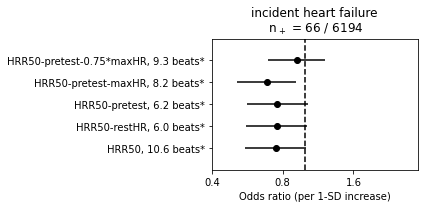

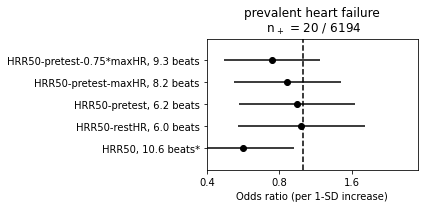

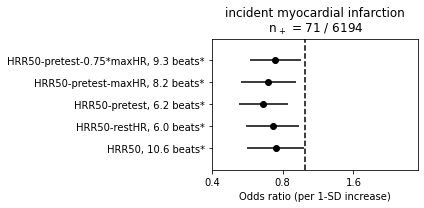

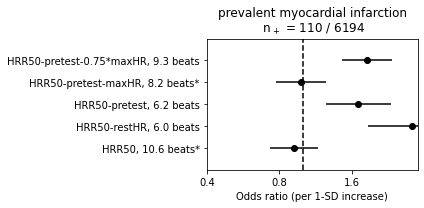

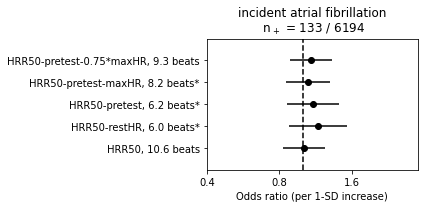

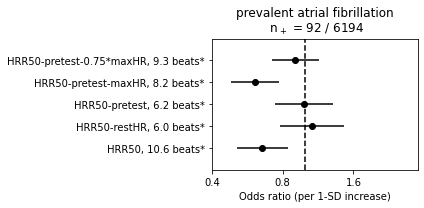

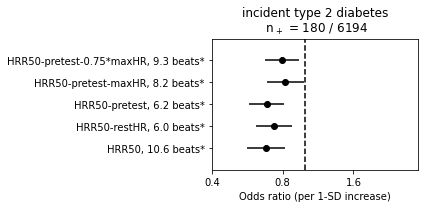

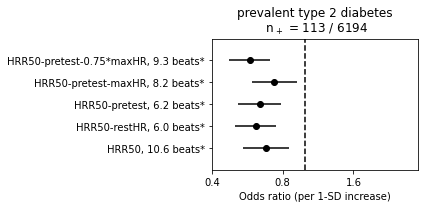

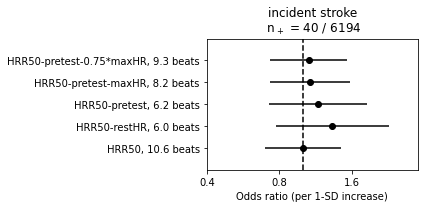

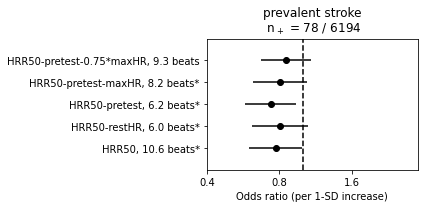

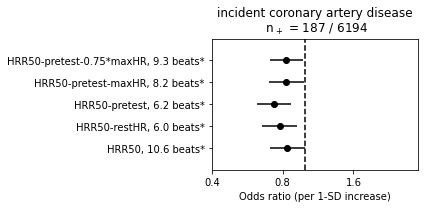

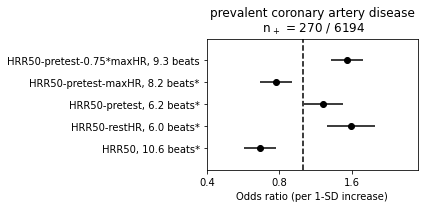

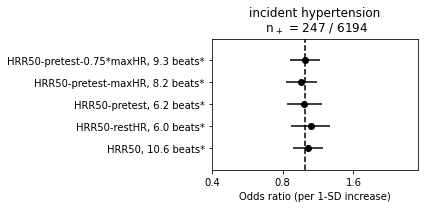

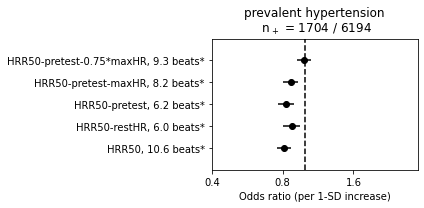

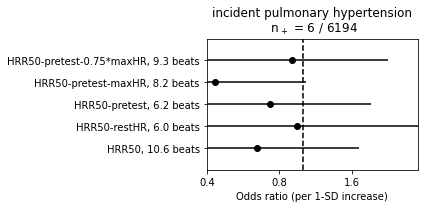

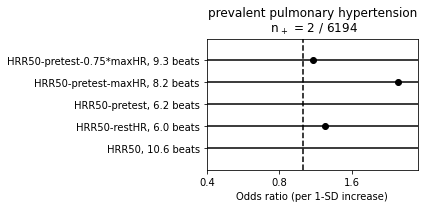

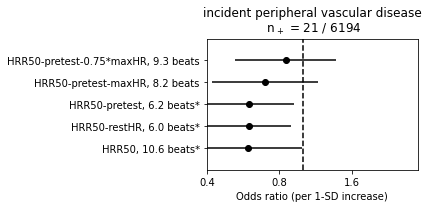

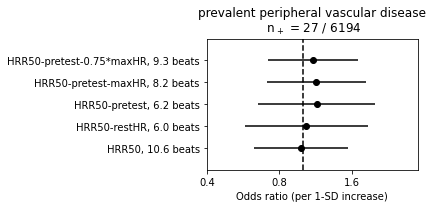

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
dis_plot_list = disease_list
phenos = or_multi_dic['50_hrr'].keys()
for dis, dis_label in disease_list:
    for occ in ['incident', 'prevalent']: 
        ors = []
        cis_minus = []
        cis_plus = []
        labels = []
        for pheno in or_multi_dic:
            if 'genetic' in pheno: 
                continue
            if 'hrr' in pheno:
                scale = 1.0
            elif 'age' in pheno:
                scale = 1.0
            else:
                scale = 1.0
            ors.append(np.exp(np.log(or_multi_dic[pheno][f'{dis}_{occ}']['OR'])*scale))
            cis_minus.append(np.exp(np.log(or_multi_dic[pheno][f'{dis}_{occ}']['OR']-or_multi_dic[pheno][f'{dis}_{occ}']['CI'][0])*scale))
            cis_plus.append(np.exp(np.log(or_multi_dic[pheno][f'{dis}_{occ}']['CI'][1]-or_multi_dic[pheno][f'{dis}_{occ}']['OR'])*scale))      
            labels.append(f'{label_dic[pheno][0]}{or_multi_dic[pheno][dis+"_"+occ]["std"]} {label_dic[pheno][1]}')
            if or_dic[pheno][f'{dis}_{occ}']['p'] < (0.05/len(or_dic)):
                labels[-1] += '*'
        f, ax = plt.subplots()
        f.set_size_inches(6, 3)
        ax.errorbar(ors, np.arange(len(ors)), xerr=(cis_minus, cis_plus), marker='o', linestyle='', color='black')  
        ax.plot([1.0, 1.0], [-1.0, len(ors)], 'k--')
        ax.set_yticks(np.arange(len(ors)))
        ax.set_yticklabels(labels)
        ax.set_xscale('log', basex=np.exp(1))   
        ax.set_xticks([0.4, 0.8, 1.6])
        ax.set_xticklabels(map(str, [0.4, 0.8, 1.6]))
#         locmin = matplotlib.ticker.LogLocator(base=np.exp(1),subs=(0.3,0.35,0.4,0.45,
#                                                                0.6,0.7,0.8,0.9,
#                                                                1.2,1.4,1.6,1.8,
#                                                                2.4,2.8,3.2,3.6))
#         ax.xaxis.set_minor_locator(locmin)
#         ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
        #ax.set_xticks(np.logspace(-0.1, 8, 6, base=np.exp(1)))
        #ax.set_xticklabels(["%.2f" %d for d in np.exp(np.arange(-0.5, 2.1, 0.5))])
        ax.set_xlabel('Odds ratio (per 1-SD increase)')
        ax.set_title(f'{occ} {dis_label}\n n$_+$ = {int(or_multi_dic[pheno][dis+"_"+occ]["n"])} / {len(all_ecgs)}')
        ax.set_ylim([-1.0, len(ors)])
        ax.set_xlim([0.4, 3.0])
        plt.tight_layout()
        f.savefig(f'{dis}_{occ}_or_multi_test.png', dpi=500)

In [25]:
# scaled
import statsmodels.api as sm
hr_multi_dic = {}
covariates = ['bmi', 'age', 'sex', 'cholesterol', 'HDL', 'smoking',
              'diastolic_bp', 'systolic_bp']
covariates_scale = ['bmi', 'age', 'cholesterol', 'HDL',
                    'diastolic_bp', 'systolic_bp']
for pheno in ['50_hrr', 'pretest_baseline_model_50_hrr_predicted',
              'pretest_model_50_hrr_predicted',
              'pretest_hr_achieved_model_50_hrr_predicted',
              'pretest_hr_achieved_model_50_hrr_predicted_75_hr_achieved']:
    if pheno in ['FID', 'IID', 'instance0_date']: 
        continue
    hr_multi_dic[pheno] = {}
    tmp_pheno = all_ecgs[['FID', pheno, 'instance0_date'] + covariates]
    for disease, disease_label in disease_list:
        for occ in ['incident']:
            hr_multi_dic[pheno][f'{disease}_{occ}'] = {}
            tmp_data = tmp_pheno.merge(diseases_unpack[['sample_id', f'{disease}_{occ}', f'{disease}_censor_date']], left_on='FID', right_on='sample_id')
            std = np.std(tmp_data[pheno].values)
            tmp_data[pheno] = (tmp_data[pheno].values - np.mean(tmp_data[pheno].values))/std
            std = ", %.1f" % std
            tmp_data[covariates_scale] = (tmp_data[covariates_scale].values \
                                          - np.mean(tmp_data[covariates_scale].values, axis=0))/\
                                          np.std(tmp_data[covariates_scale].values, axis=0)
            tmp_data['futime'] = (tmp_data[f'{disease}_censor_date']-tmp_data['instance0_date']).dt.days
            tmp_data['entry'] = 0.0
            tmp_data['intercept'] = 1.0
            tmp_data = tmp_data[tmp_data['futime']>0]
            res = sm.PHReg(tmp_data['futime'], tmp_data[[pheno]+covariates], 
                           tmp_data[f'{disease}_{occ}'], tmp_data['entry']).fit()
            hr_multi_dic[pheno][f'{disease}_{occ}']['HR'] = np.exp(res.params[0])
            hr_multi_dic[pheno][f'{disease}_{occ}']['CI'] = np.exp(res.conf_int()[0])
            hr_multi_dic[pheno][f'{disease}_{occ}']['p'] = res.pvalues[0]
            hr_multi_dic[pheno][f'{disease}_{occ}']['n'] = np.sum(tmp_data[f'{disease}_{occ}'])
            hr_multi_dic[pheno][f'{disease}_{occ}']['std'] = std

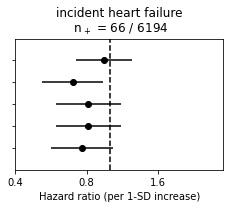

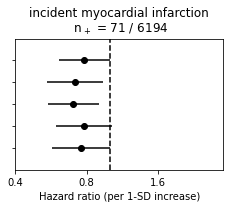

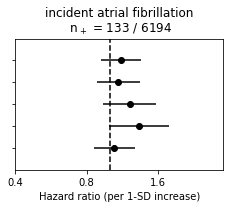

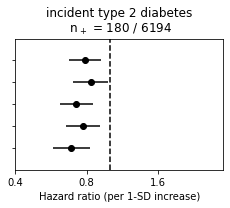

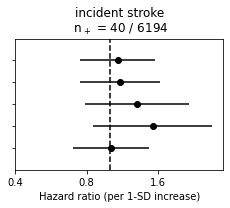

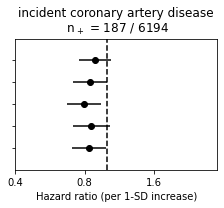

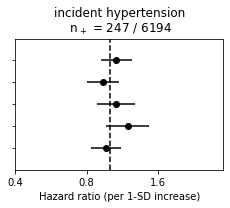

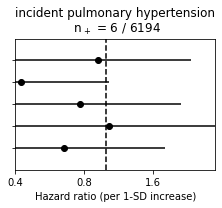

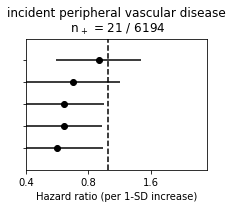

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
dis_plot_list = disease_list
phenos = or_multi_dic['50_hrr'].keys()
for dis, dis_label in disease_list:
    for occ in ['incident']: 
        hrs = []
        cis_minus = []
        cis_plus = []
        labels = []
        for pheno in hr_multi_dic:
            if 'genetic' in pheno: 
                continue
            if 'hrr' in pheno:
                scale = 1.0
            elif 'age' in pheno:
                scale = 1.0
            else:
                scale = 1.0
            hrs.append(np.exp(np.log(hr_multi_dic[pheno][f'{dis}_{occ}']['HR'])*scale))
            cis_minus.append(np.exp(np.log(hr_multi_dic[pheno][f'{dis}_{occ}']['HR']-hr_multi_dic[pheno][f'{dis}_{occ}']['CI'][0])*scale))
            cis_plus.append(np.exp(np.log(hr_multi_dic[pheno][f'{dis}_{occ}']['CI'][1]-hr_multi_dic[pheno][f'{dis}_{occ}']['HR'])*scale))      
            labels.append(f'{label_dic[pheno][0]}{hr_multi_dic[pheno][dis+"_"+occ]["std"]} {label_dic[pheno][1]}')
            if or_dic[pheno][f'{dis}_{occ}']['p'] < (0.05/len(or_dic)):
                labels[-1] += '*'
        f, ax = plt.subplots()
        f.set_size_inches(3.3, 3)
        ax.errorbar(hrs, np.arange(len(hrs)), xerr=(cis_minus, cis_plus), marker='o', linestyle='', color='black')  
        ax.plot([1.0, 1.0], [-1.0, len(hrs)], 'k--')
        ax.set_yticks(np.arange(len(hrs)))
        ax.set_yticklabels(labels)
        ax.set_yticklabels([])
        ax.set_xscale('log', basex=np.exp(1))   
        ax.set_xticks([0.4, 0.8, 1.6])
        ax.set_xticklabels(map(str, [0.4, 0.8, 1.6]))
#         locmin = matplotlib.ticker.LogLocator(base=np.exp(1),subs=(0.3,0.35,0.4,0.45,
#                                                                0.6,0.7,0.8,0.9,
#                                                                1.2,1.4,1.6,1.8,
#                                                                2.4,2.8,3.2,3.6))
#         ax.xaxis.set_minor_locator(locmin)
#         ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
        #ax.set_xticks(np.logspace(-0.1, 8, 6, base=np.exp(1)))
        #ax.set_xticklabels(["%.2f" %d for d in np.exp(np.arange(-0.5, 2.1, 0.5))])
        ax.set_xlabel('Hazard ratio (per 1-SD increase)')
        ax.set_title(f'{occ} {dis_label}\n n$_+$ = {int(or_multi_dic[pheno][dis+"_"+occ]["n"])} / {len(all_ecgs)}')
        ax.set_ylim([-1.0, len(ors)])
        ax.set_xlim([0.4, 3.0])
        plt.tight_layout()
        f.savefig(f'{dis}_{occ}_hr_multi_test.png', dpi=500)

In [ ]:
sf = sm.SurvfuncRight(tmp_data["futime"], tmp_data["Heart_Failure_V2_incident"])

In [ ]:
fig = sf.plot()
lcb, ucb = sf.simultaneous_cb()
ax = fig.get_axes()[0]
ax.fill_between(sf.surv_times, lcb, ucb, color='lightgrey')
ax.set_xlim(365, 365*10)
ax.set_ylim(0.7, 1)
ax.set_ylabel("Proportion HF-free")
ax.set_xlabel("Days since enrollment")

In [ ]:
tmp_data = tmp_data[tmp_data['futime']>0]
res = sm.PHReg(tmp_data['futime'], tmp_data['50_hrr'], 
         tmp_data['Heart_Failure_V2_incident'], tmp_data['entry']).fit()

In [ ]:
tmp_data['futime'].max()